Gradient Clipping for Differential Privacy

A **differentially private** logistic regression model is implemented using the **gradient clipping** technique.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from scipy.special import expit
import matplotlib.pyplot as plt

%matplotlib inline

# Differentially Private logistic regression
Pre-process the dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

df = pd.read_csv('/content/churn.csv')


df.replace(' ', np.nan, inplace=True)


nan_count = df.isnull().sum(axis=1).gt(0).sum()
print(f"Number of rows with NaN values: {nan_count}")


if nan_count > 0:
    rows_with_nan = df[df.isnull().any(axis=1)]
    print("\nCustomer IDs of rows with NaN values:")
    print(rows_with_nan['customerID'])

df=df.dropna()

categorical_columns = ["gender", "Partner", "Dependents", "PhoneService",
                       "MultipleLines", "InternetService", "OnlineSecurity",
                       "OnlineBackup", "DeviceProtection", "TechSupport",
                       "StreamingTV", "StreamingMovies", "Contract",
                       "PaperlessBilling", "PaymentMethod"]


encoded_df = pd.DataFrame()
for column in categorical_columns:

    one_hot_encoded = pd.get_dummies(df[column], prefix=column, drop_first=False)
    one_hot_encoded = one_hot_encoded.astype(int)

    first_value = df[column].iloc[0]


    column_to_drop = f"{column}_{first_value}"

    one_hot_encoded.drop(columns=[column_to_drop], inplace=True, errors='ignore')
    encoded_df = pd.concat([encoded_df, one_hot_encoded], axis=1)


numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()


df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


label_encoder = LabelEncoder()
df['Churn'] = label_encoder.fit_transform(df['Churn'].astype(str))


final_df = pd.concat([df.drop(columns=categorical_columns), encoded_df], axis=1)


num_observations, num_features = final_df.shape
print(f'Number of observations: {num_observations}')
print(f'Number of features: {num_features}')


final_df.to_csv('mas.csv', index=False)
import pandas as pd
df = pd.read_csv('/content/mas.csv')
dummy_column = pd.Series(1, index=df.index, name='Dummy')
df_augmented = pd.concat([dummy_column, df], axis=1)
df_augmented.to_csv('augmented_dataset.csv', index=False)
import pandas as pd


df = pd.read_csv('/content/augmented_dataset.csv')


df['Churn'] = df['Churn'].replace({0: -1, 1: +1})


unique_values = df['Churn'].unique()
print("Unique values in the 'Churn' column:", unique_values)



df.to_csv('updated_augmented_dataset.csv', index=False)
print(df.head())
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('updated_augmented_dataset.csv')
X = df.drop(columns=['Churn', 'customerID'])
y = df['Churn']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

print("Unique values in label column:", np.unique(y_train))
print("Size of training set:", X_train.shape)
print("Size of test set:", X_test.shape)

Number of rows with NaN values: 11

Customer IDs of rows with NaN values:
488     4472-LVYGI
753     3115-CZMZD
936     5709-LVOEQ
1082    4367-NUYAO
1340    1371-DWPAZ
3331    7644-OMVMY
3826    3213-VVOLG
4380    2520-SGTTA
5218    2923-ARZLG
6670    4075-WKNIU
6754    2775-SEFEE
Name: customerID, dtype: object
Number of observations: 7032
Number of features: 32


<ipython-input-23-a6185637e9f8>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
<ipython-input-23-a6185637e9f8>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Churn'] = label_encoder.fit_transform(df['Churn'].astype(str))


Unique values in the 'Churn' column: [-1  1]
   Dummy  customerID  SeniorCitizen    tenure  MonthlyCharges  TotalCharges  \
0      1  7590-VHVEG              0  0.000000        0.115423      0.001275   
1      1  5575-GNVDE              0  0.464789        0.385075      0.215867   
2      1  3668-QPYBK              0  0.014085        0.354229      0.010310   
3      1  7795-CFOCW              0  0.619718        0.239303      0.210241   
4      1  9237-HQITU              0  0.014085        0.521891      0.015330   

   Churn  gender_Male  Partner_No  Dependents_Yes  ...  \
0     -1            0           0               0  ...   
1     -1            1           1               0  ...   
2      1            1           1               0  ...   
3     -1            1           1               0  ...   
4      1            0           1               0  ...   

   StreamingTV_No internet service  StreamingTV_Yes  \
0                                0                0   
1                    

In [ ]:
def logres_obj(X, y, beta):
    """
    returns the objective value of the logistic regression model

    Parameters:
    ------------
    X, y: numpy arrays representing the input dataset
    beta: numpy array corresponding to the parameter vector

    Output:
    -------
    obj: objective value (scalar)
    """
    obj = np.log(1. + np.exp(-y * np.dot(X, beta)))
    loss = np.mean(obj)

    return loss


beta = np.zeros(X_train.shape[1])
print(logres_obj(X_train, y_train, beta))

beta = np.ones(X_train.shape[1])
print(logres_obj(X_train, y_train, beta))

0.6931471805599454
8.573535130508082


In [ ]:
def finite_diff_grad(X, y, beta, h=0.00001):
    """
    This function numerically evaluates the gradient of the objective function at beta
    """
    p = len(beta)
    grad = np.zeros(p)

    for i in range(p):
        e = np.zeros_like(beta)
        e[i] = h

        # evalute f(x+h)
        f_beta_h1 = logres_obj(X, y, beta+e)

        # evaluate f(x - h)
        f_beta_h2 = logres_obj(X, y, beta-e)

        grad[i] = (f_beta_h1 - f_beta_h2) / (2.0 * h)

    return grad

Implment the Gradient Clipping for logistic regression model.


In [ ]:
import numpy as np

def logres_per_example_grad(X, y, beta):
    """
    returns the per-example gradients of logistic regression model

    Parameters:
    ------------
    X, y: numpy arrays representing the input dataset
    beta: numpy array correspoinding to the parameter vector

    Output:
    -------
    pe_grad: 2D numpy array consisting of per-example gradients
    """

    n_samples = X.shape[0]
    pred = np.dot(X, beta)
    adj = (1 / (1 + np.exp(-y * pred))) - 1
    # Initialize a zero matrix for per-example gradients
    grad = np.zeros((n_samples, len(beta)))
    # Compute the per-example gradients by iterating through the dataset
    for eac in range(n_samples):
          grad[eac] = adj[eac] * y[eac] * X[eac]

    return grad




def logres_clipped_grad(X, y, beta, C, sigma):
    """
    Computes the clipped gradient for logistic regression with noise.

    Parameters:
    ------------
    X : numpy array
        Input features (batch_size x num_features)
    y : numpy array
        Target labels (batch_size,)
    beta : numpy array
        Parameter vector (num_features,)
    C : float
        Clipping threshold for the gradients
    sigma : float
        Noise multiplier for Gaussian noise injection

    Returns:
    --------
    noisy_grad : numpy array
        Clipped, noisy, and aggregated gradient (num_features,)
    """

    pe_grad = logres_per_example_grad(X, y, beta)


    clipped_gradients = []
    for grad in pe_grad:
        grad_norm = np.linalg.norm(grad)
        if grad_norm > C:
            clipped_grad = (C / grad_norm) * grad
        else:
            clipped_grad = grad
        clipped_gradients.append(clipped_grad)

    clipped_gradients = np.array(clipped_gradients)


    summed_clipped_grad = np.sum(clipped_gradients, axis=0)


    noise = np.random.normal(0, C * sigma, size=beta.shape)
    noisy_grad = summed_clipped_grad + noise


    noisy_grad = noisy_grad / X.shape[0]

    return noisy_grad



beta = np.zeros(X_train.shape[1])
C = 1
sigma = 1
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()

# Now call your function
noisy_grad = logres_clipped_grad(X_train_np[:8], y_train_np[:8], beta, C, sigma)




print("Noisy clipped gradient:", noisy_grad)


Noisy clipped gradient: [-0.03486082 -0.07353425 -0.02763375 -0.11910499 -0.0529337  -0.02857565
 -0.05969336  0.21611267  0.02244227 -0.01173313  0.42758383 -0.18346017
 -0.12769943  0.01340543  0.08001232 -0.0693831  -0.11986039 -0.17797868
 -0.09479028  0.1201156  -0.03121368  0.07939399 -0.09780674 -0.05401734
 -0.19374858 -0.11842183  0.01796693  0.00539609 -0.29831731 -0.18771433
  0.15267086]


Implement the stochastic gradient descent (SGD) algorithm.


In [ ]:
import numpy as np

def dp_sgd(X, y, max_iter, C, sigma, batch_size, eta=0.001):
    """
    Differentially Private Stochastic Gradient Descent (DP-SGD) algorithm.

    Parameters:
    ----------------
    X, y: input dataset (NumPy arrays)
    max_iter: int, number of epochs to iterate through the dataset
    C: float, clipping threshold for gradients
    sigma: float, scale parameter of noise distribution
    batch_size: int, size of each mini-batch
    eta: float, learning rate (step size)

    Returns:
    --------
    sol_path: list, solutions at the end of each epoch
    obj_vals: list, objective values at the end of each epoch
    """
    sol_path = []
    obj_vals = []


    n, p = X.shape
    beta = np.zeros(p)


    for epoch in range(max_iter):

        indices = np.arange(n)
        np.random.shuffle(indices)
        X_shuffled = X[indices]
        y_shuffled = y[indices]


        for start in range(0, n, batch_size):
            end = start + batch_size


            if end > n:
                continue


            X_batch = X_shuffled[start:end]
            y_batch = y_shuffled[start:end]


            grad = logres_clipped_grad(X_batch, y_batch, beta, C, sigma)


            beta -= eta * grad


        sol_path.append(beta.copy())
        obj_vals.append(logres_obj(X, y, beta))

    return sol_path, obj_vals


Training the model

Best sigma for C=1: 0.001 with max training accuracy: 0.7342222222222222
Best sigma for C=4: 0.001 with max training accuracy: 0.7658666666666667


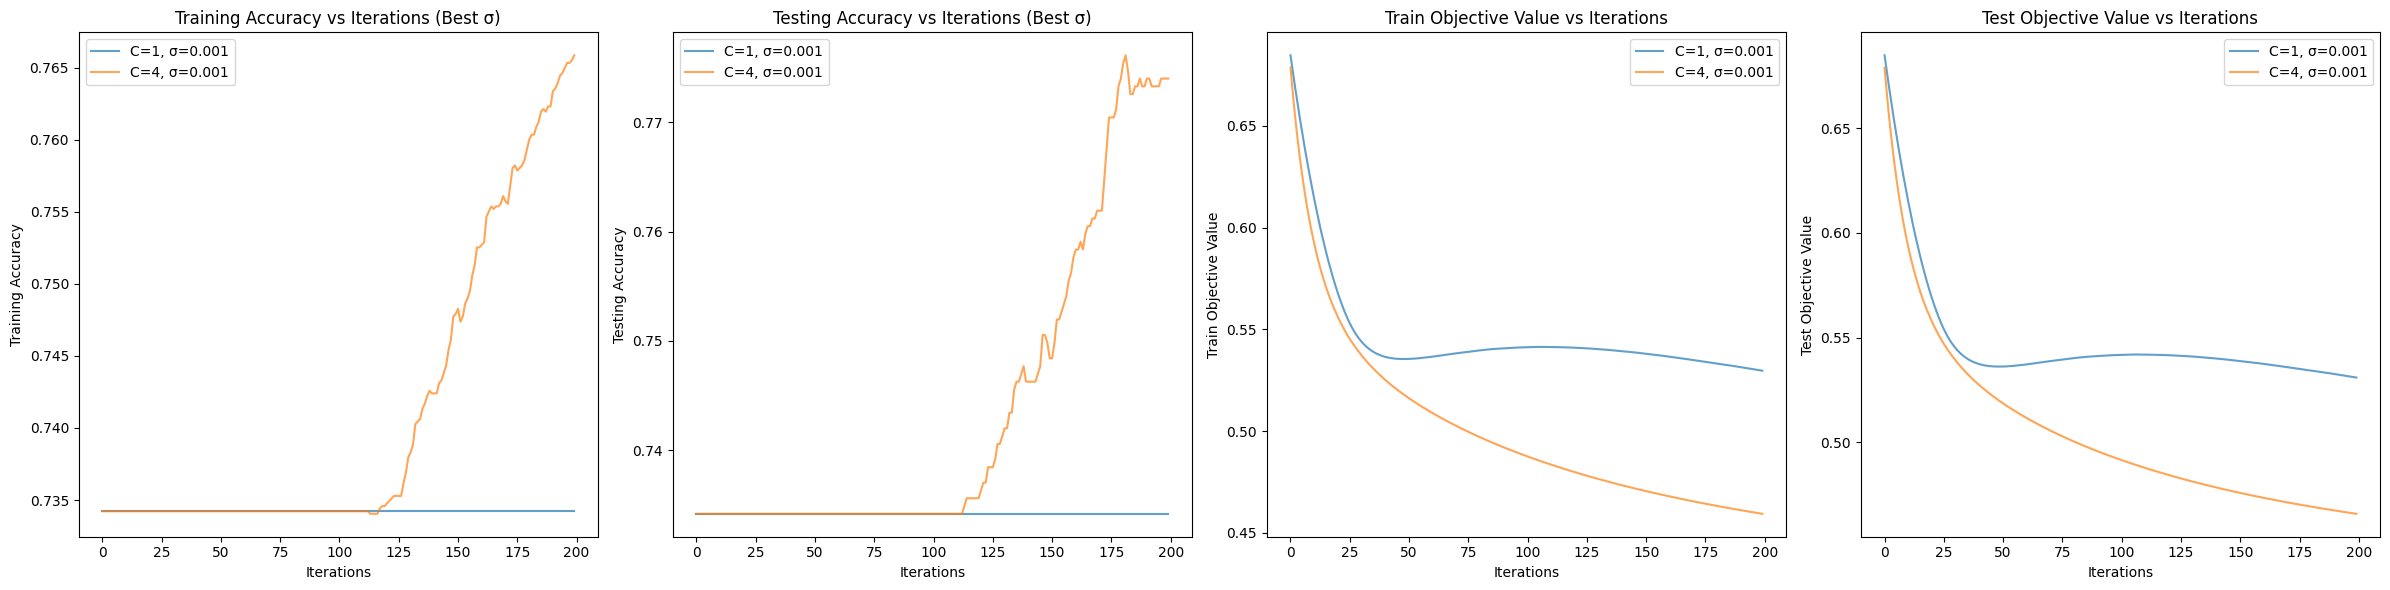

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Function for calculating accuracy
def calculate_accuracy(beta, X, y):
    predictions = np.sign(np.dot(X, beta))
    return accuracy_score(y, predictions)
def train_and_evaluate_with_testing(X_train, y_train, X_test, y_test, C_values, max_iter=200, batch_size=128):
    results = {}
    eta = 0.1  # Fixed learning rate

    for C in C_values:
        sigma_values = [0.001, 0.003, 0.005, 0.01, 0.1]  # Example sigma values for grid search

        best_sigma = None
        best_accuracy = 0

        for sigma in sigma_values:
            # Call DP-SGD to get solutions and training objective values
            sol_path, obj_vals_train = dp_sgd(X_train, y_train, max_iter=max_iter, C=C, sigma=sigma, batch_size=batch_size)

            # Evaluate on the training and test sets
            train_accuracies = [calculate_accuracy(beta, X_train, y_train) for beta in sol_path]
            test_accuracies = [calculate_accuracy(beta, X_test, y_test) for beta in sol_path]

            # Calculate objective values for test data
            obj_vals_test = [logres_obj(X_test, y_test, beta) for beta in sol_path]

            # Select the best sigma based on max training accuracy
            final_train_accuracy = train_accuracies[-1]
            if final_train_accuracy > best_accuracy:
                best_accuracy = final_train_accuracy
                best_sigma = sigma
                # Store results for the best sigma
                results[C] = {
                    "train_accuracies": train_accuracies,
                    "test_accuracies": test_accuracies,
                    "obj_vals_train": obj_vals_train,
                    "obj_vals_test": obj_vals_test,
                    "best_sigma": best_sigma,
                }

        print(f"Best sigma for C={C}: {best_sigma} with max training accuracy: {best_accuracy}")

    # Plot results
    plt.figure(figsize=(24, 6))

    # Plot training accuracy
    plt.subplot(1, 4, 1)
    for C in C_values:
        plt.plot(range(len(results[C]["train_accuracies"])),
                 results[C]["train_accuracies"],
                 label=f"C={C}, σ={results[C]['best_sigma']}",
                 alpha=0.7)
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.title("Training Accuracy vs Iterations (Best σ)")
    plt.legend()

    # Plot testing accuracy
    plt.subplot(1, 4, 2)
    for C in C_values:
        plt.plot(range(len(results[C]["test_accuracies"])),
                 results[C]["test_accuracies"],
                 label=f"C={C}, σ={results[C]['best_sigma']}",
                 alpha=0.7)
    plt.xlabel("Iterations")
    plt.ylabel("Testing Accuracy")
    plt.title("Testing Accuracy vs Iterations (Best σ)")
    plt.legend()

    # Plot training objective values
    plt.subplot(1, 4, 3)
    for C in C_values:
        plt.plot(range(len(results[C]["obj_vals_train"])),
                 results[C]["obj_vals_train"],
                 label=f"C={C}, σ={results[C]['best_sigma']}",
                 alpha=0.7)
    plt.xlabel("Iterations")
    plt.ylabel("Train Objective Value")
    plt.title("Train Objective Value vs Iterations")
    plt.legend()

    # Plot testing objective values
    plt.subplot(1, 4, 4)
    for C in C_values:
        plt.plot(range(len(results[C]["obj_vals_test"])),
                 results[C]["obj_vals_test"],
                 label=f"C={C}, σ={results[C]['best_sigma']}",
                 alpha=0.7)
    plt.xlabel("Iterations")
    plt.ylabel("Test Objective Value")
    plt.title("Test Objective Value vs Iterations")
    plt.legend()

    plt.tight_layout()
    plt.show()

X_train = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
X_test = X_test.values if isinstance(X_test, pd.DataFrame) else X_test
y_train = y_train.values if isinstance(y_train, pd.Series) else y_train
y_test = y_test.values if isinstance(y_test, pd.Series) else y_test
train_and_evaluate_with_testing(X_train, y_train, X_test, y_test, C_values=[1, 4], max_iter=200, batch_size=128)


Show the effect of clipping threshold on the accuracy.


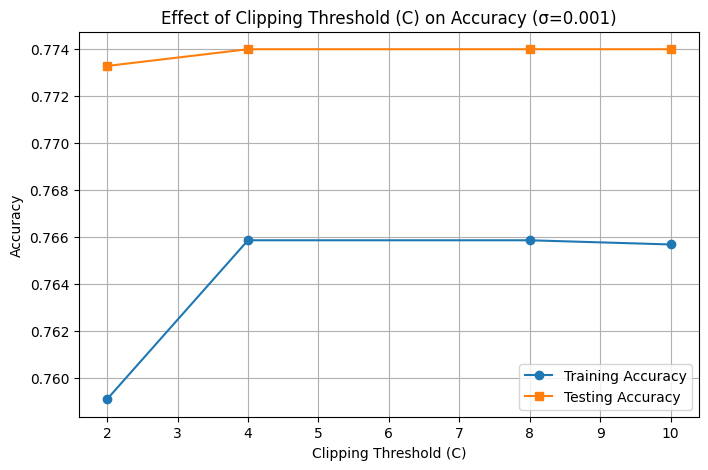

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

def calculate_accuracy(beta, X, y):
    """
    Calculate accuracy for logistic regression.
    """
    predictions = np.sign(np.dot(X, beta))
    return accuracy_score(y, predictions)

def evaluate_clipping_effect(X_train, y_train, X_test, y_test, base_C, sigma, max_iter=200, batch_size=128):
    """
    Evaluate and plot the effect of the clipping threshold on accuracy.
    """
    C_values = [base_C, 2 * base_C, 4 * base_C, 5 * base_C]
    train_accuracies = []
    test_accuracies = []

    for C in C_values:

        sol_path, _ = dp_sgd(X_train, y_train, max_iter=max_iter, C=C, sigma=sigma, batch_size=batch_size)


        final_beta = sol_path[-1]
        train_acc = calculate_accuracy(final_beta, X_train, y_train)
        test_acc = calculate_accuracy(final_beta, X_test, y_test)

        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)


    plt.figure(figsize=(8, 5))
    plt.plot(C_values, train_accuracies, marker='o', label='Training Accuracy')
    plt.plot(C_values, test_accuracies, marker='s', label='Testing Accuracy')
    plt.xlabel("Clipping Threshold (C)")
    plt.ylabel("Accuracy")
    plt.title(f"Effect of Clipping Threshold (C) on Accuracy (σ={sigma})")
    plt.legend()
    plt.grid(True)
    plt.show()


base_C = 2
sigma_fixed = 0.001


X_train = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
X_test = X_test.values if isinstance(X_test, pd.DataFrame) else X_test
y_train = y_train.values if isinstance(y_train, pd.Series) else y_train
y_test = y_test.values if isinstance(y_test, pd.Series) else y_test


evaluate_clipping_effect(X_train, y_train, X_test, y_test, base_C=base_C, sigma=sigma_fixed)


Show the effect of batch size on the accuracy

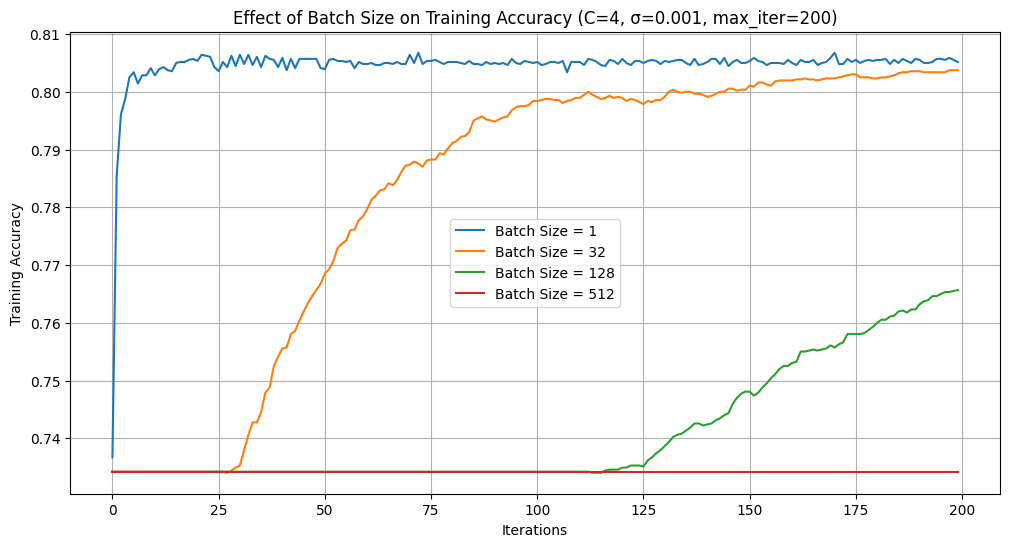

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

def calculate_accuracy(beta, X, y):
    """
    Calculate accuracy for logistic regression.
    """
    predictions = np.sign(np.dot(X, beta))
    return accuracy_score(y, predictions)

def evaluate_batch_size_effect(X_train, y_train, X_test, y_test, C, sigma, max_iter, batch_sizes):
    """
    Evaluate and plot the effect of batch size on accuracy over iterations.
    """
    results = {}

    for batch_size in batch_sizes:

        sol_path, _ = dp_sgd(X_train, y_train, max_iter=max_iter, C=C, sigma=sigma, batch_size=batch_size)


        train_accuracies = [calculate_accuracy(beta, X_train, y_train) for beta in sol_path]


        results[batch_size] = train_accuracies


    plt.figure(figsize=(12, 6))
    for batch_size, accuracies in results.items():
        plt.plot(range(len(accuracies)), accuracies, label=f"Batch Size = {batch_size}")

    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.title(f"Effect of Batch Size on Training Accuracy (C={C}, σ={sigma}, max_iter={max_iter})")
    plt.legend()
    plt.grid(True)
    plt.show()


fixed_C = 4
fixed_sigma = 0.001
max_iterations = 200
batch_sizes = [1, 32, 128, 512]

# Ensure compatibility of inputs
X_train = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
X_test = X_test.values if isinstance(X_test, pd.DataFrame) else X_test
y_train = y_train.values if isinstance(y_train, pd.Series) else y_train
y_test = y_test.values if isinstance(y_test, pd.Series) else y_test

# Run the evaluation
evaluate_batch_size_effect(X_train, y_train, X_test, y_test, C=fixed_C, sigma=fixed_sigma, max_iter=max_iterations, batch_sizes=batch_sizes)


Search for the clipping threshold values

In [ ]:
import numpy as np



def smallest_clip_thresh(X_train, y_train, beta):
    """
    Find the smallest C > 0 such that no per-example gradient is clipped.
    """
    per_example_gradients = logres_per_example_grad(X_train, y_train, beta)
    norms = np.linalg.norm(per_example_gradients, axis=1)
    smallest_C = np.max(norms)
    return smallest_C

def largest_clip_thresh(X_train, y_train, beta):
    """
    Find the largest C > 0 such that at least 90% of per-example gradients are clipped.
    """
    per_example_gradients = logres_per_example_grad(X_train, y_train, beta)
    norms = np.linalg.norm(per_example_gradients, axis=1)
    sorted_norms = np.sort(norms)
    index = int(0.1 * len(sorted_norms))
    largest_C = sorted_norms[index]
    return largest_C


np.random.seed(42)
beta = np.random.uniform(0, 1, X_train.shape[1])


smallest_C = smallest_clip_thresh(X_train, y_train, beta)
largest_C = largest_clip_thresh(X_train, y_train, beta)

print(f"Smallest C such that no gradients are clipped: {smallest_C}")
print(f"Largest C such that at least 90% of gradients are clipped: {largest_C}")


Smallest C such that no gradients are clipped: 4.207838009857567
Largest C such that at least 90% of gradients are clipped: 0.030072474469059286
